# <b> Introdução </b>
Nosso primeiro resultado será "IBGE - API de serviço de dados", que nos levará direto a uma API com informações coletadas no censo de 2010, divididas em "Frequência por nome" e "Ranking por frequência".

In [102]:
import pandas as pd

## 1 - Lendo nomes com Json

In [103]:
nomes_f = pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=f")

#### Lendo arquivos Json

In [104]:
nomes_f

,nome,regiao,freq,rank,sexo
0,MARIA,0,11694738,1,F
1,ANA,0,3079729,2,F
2,FRANCISCA,0,721637,3,F
3,ANTONIA,0,588783,4,F
4,ADRIANA,0,565621,5,F
...,...,...,...,...,...
195,ROSANE,0,82203,196,F
196,IVONETE,0,81878,197,F
197,LUCIANE,0,81230,198,F
198,ISADORA,0,81100,199,F


In [105]:
nomes_m= pd.read_json("https://servicodados.ibge.gov.br/api/v1/censos/nomes/ranking?qtd=200&sexo=m")

In [106]:
nomes_m

,nome,regiao,freq,rank,sexo
0,JOSE,0,5732508,1,M
1,JOAO,0,2971935,2,M
2,ANTONIO,0,2567494,3,M
3,FRANCISCO,0,1765197,4,M
4,CARLOS,0,1483121,5,M
...,...,...,...,...,...
195,WALTER,0,67207,196,M
196,ARLINDO,0,66669,197,M
197,MICHAEL,0,65736,198,M
198,ALVARO,0,65444,199,M


#### Sorteando nomes

In [107]:
nomes_f.sample(5)

,nome,regiao,freq,rank,sexo
1,ANA,0,3079729,2,F
28,SONIA,0,354487,29,F
75,MARLI,0,209633,76,F
131,ANGELICA,0,123200,132,F
143,MAIARA,0,112094,144,F


#### Contando nomes armazenados

In [108]:
print(f"Quantidade de nomes: " + str(len(nomes_f) + len(nomes_m)))

Quantidade de nomes: 400


#### Juntando os frames

In [109]:
frames = [nomes_f, nomes_m]
frames

[          nome  regiao      freq  rank sexo
 0        MARIA       0  11694738     1    F
 1          ANA       0   3079729     2    F
 2    FRANCISCA       0    721637     3    F
 3      ANTONIA       0    588783     4    F
 4      ADRIANA       0    565621     5    F
 ..         ...     ...       ...   ...  ...
 195     ROSANE       0     82203   196    F
 196    IVONETE       0     81878   197    F
 197    LUCIANE       0     81230   198    F
 198    ISADORA       0     81100   199    F
 199      NILZA       0     80128   200    F
 
 [200 rows x 5 columns],
           nome  regiao     freq  rank sexo
 0         JOSE       0  5732508     1    M
 1         JOAO       0  2971935     2    M
 2      ANTONIO       0  2567494     3    M
 3    FRANCISCO       0  1765197     4    M
 4       CARLOS       0  1483121     5    M
 ..         ...     ...      ...   ...  ...
 195     WALTER       0    67207   196    M
 196    ARLINDO       0    66669   197    M
 197    MICHAEL       0    65736   19

In [110]:
nomes = pd.concat(frames)['nome'].to_frame()
nomes

,nome
0,MARIA
1,ANA
2,FRANCISCA
3,ANTONIA
4,ADRIANA
...,...
195,WALTER
196,ARLINDO
197,MICHAEL
198,ALVARO



#### Incluindo ID dos alunos

In [111]:
import numpy as np

In [112]:
np.random.seed(123)

In [113]:
total_alunos = len(nomes)
total_alunos

400

In [114]:
nomes['id_aluno'] = np.random.permutation(total_alunos) + 1
nomes

,nome,id_aluno
0,MARIA,235
1,ANA,43
2,FRANCISCA,304
3,ANTONIA,156
4,ADRIANA,343
...,...,...
195,WALTER,231
196,ARLINDO,99
197,MICHAEL,323
198,ALVARO,383


### Criando e-mail


In [115]:
dominio = ['@dominiodoemail.com.br' , '@servicodoemail.com']
nomes['dominio'] = np.random.choice(dominio, total_alunos)

In [116]:
nomes

,nome,id_aluno,dominio
0,MARIA,235,@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com
...,...,...,...
195,WALTER,231,@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com


In [117]:
nomes['email'] = nomes.nome.str.cat(nomes.dominio).str.lower()
nomes

,nome,id_aluno,dominio,email
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com
...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com


## 2 - Criando cursos

#### Instalando bibliotecas

In [118]:
!pip install html5lib
!pip install lxml

In [119]:
import html5lib

In [120]:
url = 'https://tabela-cursos.herokuapp.com/index.html'


In [121]:
cursos = pd.read_html(url)

In [122]:
cursos

[                          Nome do curso
 0                 Lógica de programação
 1                         Java para Web
 2                           C# para Web
 3                         Ruby on Rails
 4                      Cursos de Python
 5                         PHP com MySql
 6                         .NET para web
 7            Novas integrações com Java
 8                          TDD com Java
 9                   Código limpo com C#
 10  Preparatório para certificação Java
 11                      Hardware básico
 12                Persistência com .NET
 13                  Desenvolvendo jogos
 14                     Análise de dados
 15                   Estatística básica
 16                  Internet das coisas
 17                Programação funcional
 18                Boas práticas em Java
 19          Orientação objetos com Java]

#### Convertendo para dataframe

In [123]:
cursos = cursos[0]

In [124]:
cursos.sample(5)

,Nome do curso
6,.NET para web
5,PHP com MySql
14,Análise de dados
4,Cursos de Python
15,Estatística básica


#### Alterando o index

In [125]:

cursos = cursos.rename(columns= {'Nome do curso' : 'nome_do_curso'})

In [126]:
cursos.sample(6)

,nome_do_curso
17,Programação funcional
16,Internet das coisas
15,Estatística básica
0,Lógica de programação
12,Persistência com .NET
2,C# para Web


#### Criando ID

In [127]:
cursos['id'] = cursos.index + 1

In [128]:
cursos

,nome_do_curso,id
0,Lógica de programação,1
1,Java para Web,2
2,C# para Web,3
3,Ruby on Rails,4
4,Cursos de Python,5
5,PHP com MySql,6
6,.NET para web,7
7,Novas integrações com Java,8
8,TDD com Java,9
9,Código limpo com C#,10


#### Mudando o index

In [129]:
cursos = cursos.set_index('id')

In [130]:
cursos.head(6)

,nome_do_curso
id,
1,Lógica de programação
2,Java para Web
3,C# para Web
4,Ruby on Rails
5,Cursos de Python
6,PHP com MySql


# 3 - Escrevendo csv, json e html

#### Matriculando os alunos nos cursos

In [131]:
nomes.sample(5)

,nome,id_aluno,dominio,email
105,MILENA,371,@dominiodoemail.com.br,milena@dominiodoemail.com.br
149,ISRAEL,65,@servicodoemail.com,israel@servicodoemail.com
95,ANDREA,292,@dominiodoemail.com.br,andrea@dominiodoemail.com.br
66,DANILO,348,@servicodoemail.com,danilo@servicodoemail.com
63,ERICA,228,@servicodoemail.com,erica@servicodoemail.com


In [132]:
nomes['matriculas'] = np.ceil(np.random.exponential(size= total_alunos)* 1.5).astype(int)

In [133]:
nomes

,nome,id_aluno,dominio,email,matriculas
0,MARIA,235,@dominiodoemail.com.br,maria@dominiodoemail.com.br,2
1,ANA,43,@servicodoemail.com,ana@servicodoemail.com,1
2,FRANCISCA,304,@servicodoemail.com,francisca@servicodoemail.com,1
3,ANTONIA,156,@servicodoemail.com,antonia@servicodoemail.com,6
4,ADRIANA,343,@servicodoemail.com,adriana@servicodoemail.com,1
...,...,...,...,...,...
195,WALTER,231,@dominiodoemail.com.br,walter@dominiodoemail.com.br,1
196,ARLINDO,99,@servicodoemail.com,arlindo@servicodoemail.com,2
197,MICHAEL,323,@dominiodoemail.com.br,michael@dominiodoemail.com.br,1
198,ALVARO,383,@servicodoemail.com,alvaro@servicodoemail.com,3


In [134]:
nomes.matriculas.describe()

count    400.000000
mean       1.950000
std        1.492672
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: matriculas, dtype: float64

#### Visualizando atráves do seaborn

In [135]:
import seaborn as sns

c:\Users\marcu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='matriculas', ylabel='Density'>

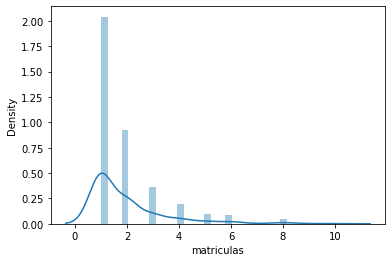

In [136]:
sns.distplot(nomes.matriculas)

#### Quantidade de cursos por alunos

In [137]:
cursos_alunos = nomes.matriculas.value_counts().to_frame()

In [138]:
cursos_alunos

,matriculas
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1
9,1


In [146]:

cursos_alunos.index.name ='qtd_cursos'
cursos_alunos

,matriculas
qtd_cursos,
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1


In [147]:
cursos_alunos.rename(columns = {'matriculas' : 'alunos_matriculados'})

,alunos_matriculados
qtd_cursos,
1,216
2,98
3,38
4,21
5,10
6,9
8,5
7,1
10,1


#### Selecionando cursos

Para fazermos essa distribuição, criaremos três variáveis. A primeira delas é total_matriculas, que será inicializada como um array vazio. Em seguida, criaremos uma variável x que receberá a chamada de np.random.rand(20, uma maneira de calcularmos randomicamente os 20 cursos que temos no dataframe. Por fim, teremos uma variável prob (de probabilidade) que receberá a divisão de x por sum(x) (a soma de x).

In [149]:
todas_matriculas = []
x = np.random.rand(20)
prob = x / sum(x)

Depois de inicializarmos essas variáveis, a ideia é buscarmos em cada linha do dataframe o nome, o id_aluno e a quantidade de matriculas para então atribuirmos aos alunos a quantidade correta de cursos escolhidos aleatoriamente.

Passaremos para a criação de um iterador for que buscará o index e a linha que iremos utilizar, a qual chamaremos de row. Esse iterador percorrerá o dataframe nomes com o auxílio da função iterrows(), que nos devolve cada linha do conjunto.

In [151]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas

De posse dessas informações, precisamos decidir quantos cursos terão que ser atribuídos a cada aluno com base na sua quantidade de matrículas. Para isso, teremos um novo iterador for que buscará cada elemento (i) no intervalo range(matriculas) (de 0 até o valor de matriculas). Teremos então uma matrícula mat que receberá o id do aluno e o id do curso, que conseguiremos aleatoriamente utilizando a função np.random.choice(). Esta, por sua vez, receberá como parâmetros o índice de cursos (cursos.index e a variável de probabilidade que inicializamos anteriormente (p = prob).

In [153]:
for index, row in nomes.iterrows():
    id = row.id_aluno
    matriculas = row.matriculas
    for i in range(matriculas):
        mat = [id, np.random.choice(cursos.index, p = prob)]